In [210]:
import pandas as pd
data= pd.read_csv("chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
df_ml=data.copy()
df_nlp=data.copy() 


In [211]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [212]:
df_ml["date"] = pd.to_datetime(df_ml["date"], errors='coerce')

df_ml["date"]

0    2024-12-24
1    2024-07-26
2    2024-08-22
3    2025-04-24
4    2024-08-15
5    2024-07-04
6    2024-08-13
7    2025-02-22
8    2024-12-12
9    2025-02-23
10   2025-03-07
11   2025-04-04
12   2024-12-15
13   2024-09-28
14   2025-06-12
15   2025-03-30
16   2024-10-21
17   2025-05-16
18   2024-12-23
19   2025-03-15
20   2025-02-12
21   2025-02-20
22   2025-04-10
23   2025-06-09
24   2024-12-14
25   2024-12-19
26   2024-12-08
27   2025-04-21
28   2024-08-27
29   2024-10-18
30   2025-05-28
31   2025-04-04
32   2025-03-28
33   2025-03-29
34   2024-10-13
35   2024-10-26
36   2025-01-15
37   2025-04-21
38   2024-12-31
39   2024-08-02
40   2024-07-02
41   2024-07-26
42   2025-05-12
43   2024-08-15
44   2024-07-05
45   2024-11-09
46   2025-02-11
47   2025-01-01
48   2024-10-14
49   2025-03-11
Name: date, dtype: datetime64[ns]

In [213]:
rating_to_sent = {
    1: "Negative",
    2: "Negative",
    3: "Neutral",
    4: "Positive",
    5: "Positive"
}

df_ml['label'] = df_ml['rating'].map(rating_to_sent)

In [214]:
print(df_ml[['rating', 'label']].head(10))

   rating     label
0       1  Negative
1       2  Negative
2       5  Positive
3       3   Neutral
4       1  Negative
5       4  Positive
6       2  Negative
7       3   Neutral
8       1  Negative
9       2  Negative


In [215]:
num_cols = df_ml.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_ml.select_dtypes(include=['object', 'category']).columns

In [216]:
cat_cols

Index(['title', 'review', 'username', 'platform', 'language', 'location',
       'version', 'verified_purchase', 'label'],
      dtype='object')

In [217]:
num_cols

Index(['rating', 'helpful_votes', 'review_length'], dtype='object')

In [218]:
from sklearn.preprocessing import LabelEncoder

cat_cols_ml = [c for c in cat_cols if c not in ['review','date']]
le = LabelEncoder()
for col in cat_cols_ml:
    df_ml[col] = le.fit_transform(df_ml[col])

In [219]:
cat_cols_ml

['title',
 'username',
 'platform',
 'language',
 'location',
 'version',
 'verified_purchase',
 'label']

In [220]:
df_ml

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,label
0,2024-12-24,12,Impressive natural language understanding. Alm...,1,13,25,9,3,0,27,10,0,0
1,2024-07-26,30,Sometimes gives wrong answers or outdated info...,2,16,35,14,2,2,30,17,0,0
2,2024-08-22,27,Great tool for generating content quickly. Int...,5,1,94,10,1,2,7,37,0,2
3,2025-04-24,25,Great tool for generating content quickly. Sta...,3,17,50,15,0,0,5,39,0,1
4,2024-08-15,40,Excellent for language translation and grammar...,1,12,33,11,2,3,41,43,1,0
5,2024-07-04,19,Explains complex topics clearly and simply. De...,4,37,29,12,2,3,36,13,1,2
6,2024-08-13,1,Excellent for language translation and grammar...,2,14,45,10,1,1,17,24,0,0
7,2025-02-22,7,Sometimes gives wrong answers or outdated info...,3,32,77,12,1,1,2,46,0,1
8,2024-12-12,26,Sometimes gives wrong answers or outdated info...,1,24,66,13,3,0,14,47,1,0
9,2025-02-23,31,Very helpful for coding and debugging tasks. S...,2,15,33,19,1,1,5,36,0,0


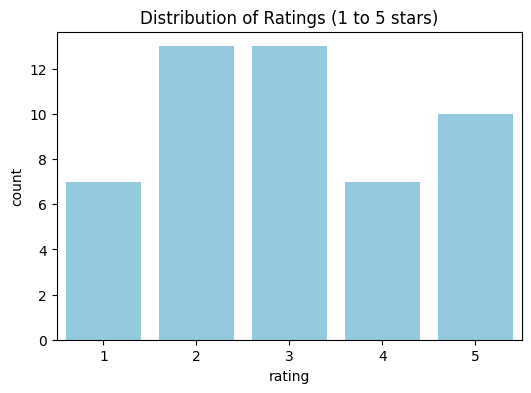

In [221]:
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df_ml, color='skyblue')  # single color
plt.title('Distribution of Ratings (1 to 5 stars)')
plt.show()


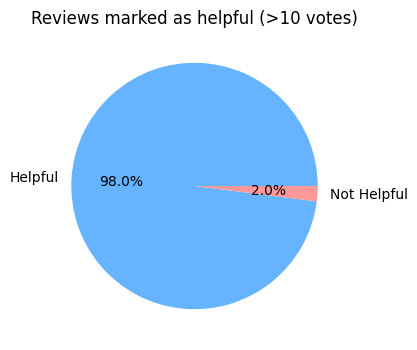

In [222]:
threshold = 10
helpful_count = (df_ml['helpful_votes'] > threshold).sum()
not_helpful_count = (df_ml['helpful_votes'] <= threshold).sum()

plt.figure(figsize=(5,4))
plt.pie([helpful_count, not_helpful_count], labels=['Helpful', 'Not Helpful'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title(f'Reviews marked as helpful (>{threshold} votes)')
plt.show()

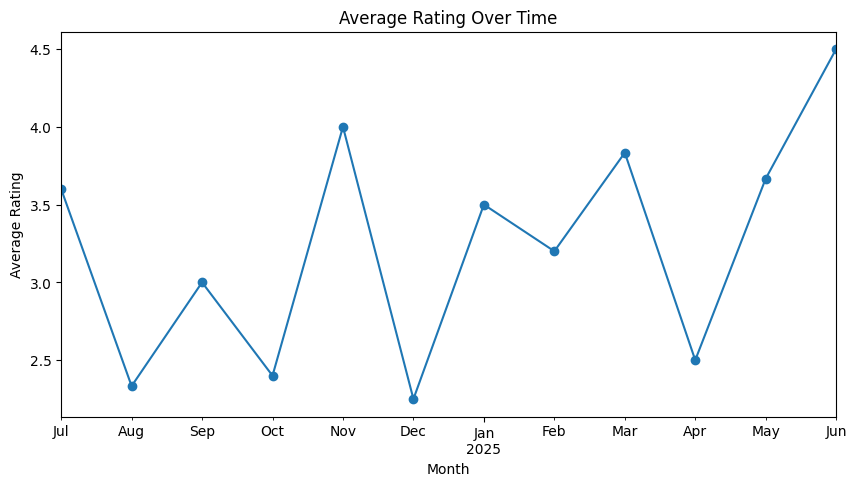

In [223]:
df_ml['date'] = pd.to_datetime(data['date'])  # reload date
avg_rating_time = df_ml.groupby(df_ml['date'].dt.to_period('M'))['rating'].mean()

avg_rating_time.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Average Rating Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Month')
plt.show()

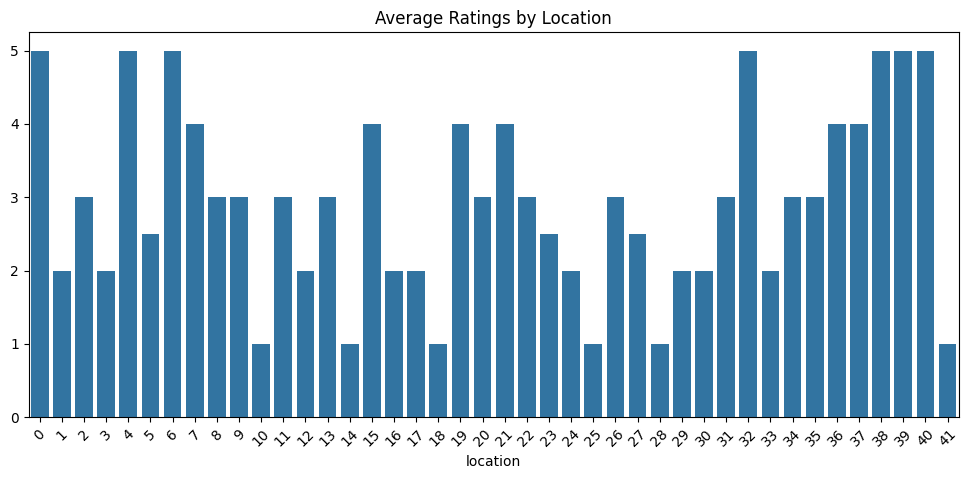

In [224]:
loc_avg = df_ml.groupby('location')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=loc_avg.index, y=loc_avg.values)
plt.xticks(rotation=45)
plt.title('Average Ratings by Location')
plt.show()


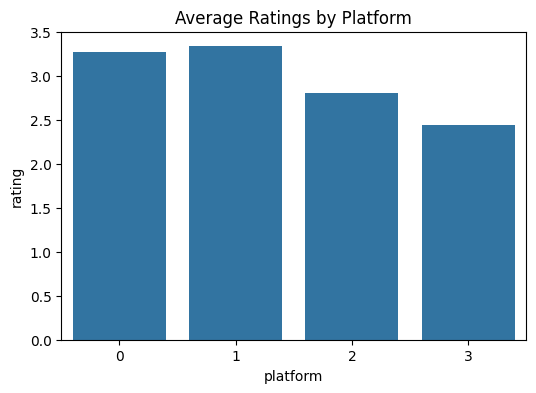

In [225]:
plt.figure(figsize=(6,4))
sns.barplot(x='platform', y='rating', data=df_ml, errorbar=None)
plt.title('Average Ratings by Platform')
plt.show()

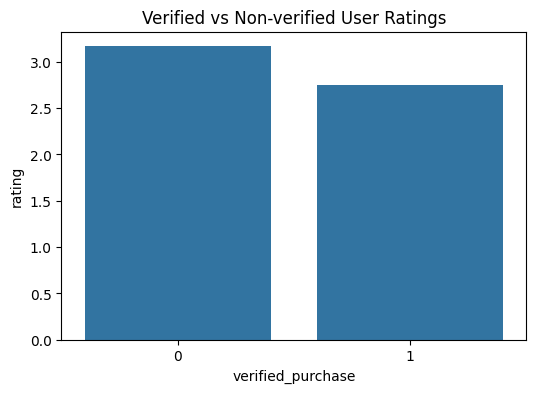

In [226]:
plt.figure(figsize=(6,4))
sns.barplot(x='verified_purchase', y='rating', data=df_ml, errorbar=None)
plt.title('Verified vs Non-verified User Ratings')
plt.show()

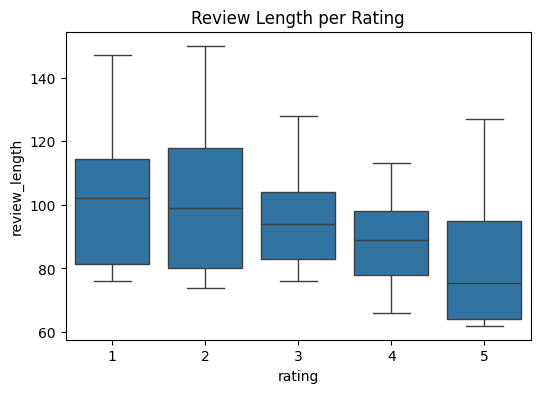

In [227]:
df_ml['review'] = df_ml['review'].astype(str)


df_ml['review_length'] = df_ml['review'].str.len()
plt.figure(figsize=(6,4))
sns.boxplot(x='rating', y='review_length', data=df_ml)
plt.title('Review Length per Rating')
plt.show()


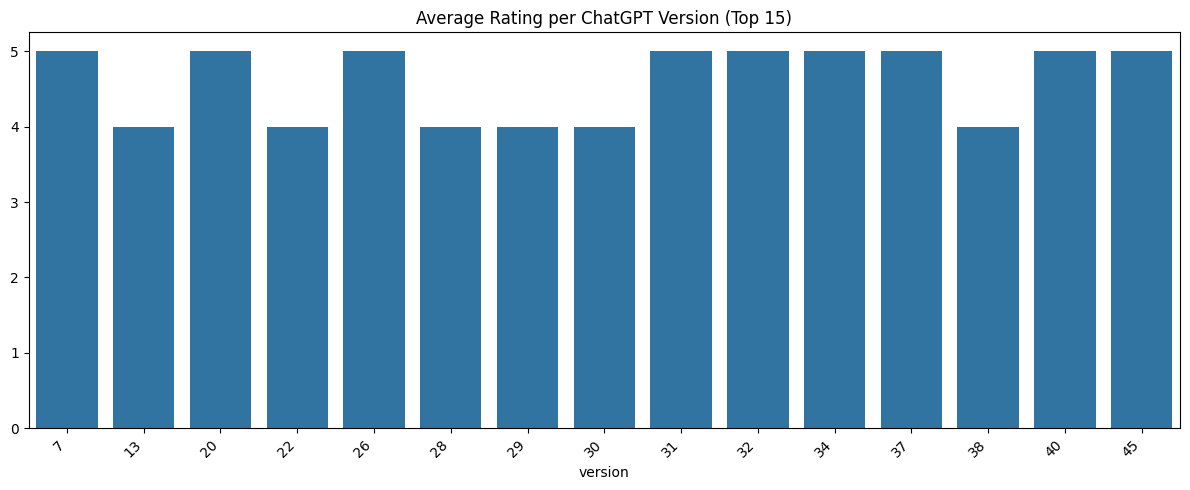

In [228]:
version_avg = df_ml.groupby('version')['rating'].mean().sort_values(ascending=False)

top_version_avg = version_avg.head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=top_version_avg.index, y=top_version_avg.values)
plt.xticks(rotation=45, ha='right') 
plt.title('Average Rating per ChatGPT Version (Top 15)')
plt.tight_layout() 
plt.show()

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

x = df_ml.drop(['label','review','date'], axis=1)
y = df_ml['label']

from sklearn.model_selection import train_test_split, GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


lr=LogisticRegression()
knn=KNeighborsClassifier()


In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Logistic Regression pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

lr_para = {
    'lr__fit_intercept': [True, False],
    'lr__max_iter': [200, 500, 1000],
    'lr__solver': ['lbfgs', 'saga']
}

# KNN pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

knn_para = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance']
}


# Logistic Regression
grid_lr = GridSearchCV(pipe_lr, lr_para, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(xtrain, ytrain)

# KNN
grid_knn = GridSearchCV(pipe_knn, knn_para, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(xtrain, ytrain)


# Best params and scores
print("Best Logistic Regression:", grid_lr.best_params_, "Score:", grid_lr.best_score_)
print("Best KNN:", grid_knn.best_params_, "Score:", grid_knn.best_score_)


Best Logistic Regression: {'lr__fit_intercept': True, 'lr__max_iter': 200, 'lr__solver': 'lbfgs'} Score: 0.85
Best KNN: {'knn__n_neighbors': 3, 'knn__weights': 'uniform'} Score: 0.65


In [231]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     int32         
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     int32         
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     int32         
 8   language           50 non-null     int32         
 9   location           50 non-null     int32         
 10  version            50 non-null     int32         
 11  verified_purchase  50 non-null     int32         
 12  label              50 non-null     int32         
dtypes: datetime64[ns](1), int32(8), int64(3), object(1)
memory usage: 3

In [232]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [233]:
X_dl = df_ml.drop(['label','review','date'], axis=1).values   # features
y_dl = df_ml['label'].values  


le_dl = LabelEncoder()
y_encoded = le_dl.fit_transform(y_dl)   # e.g., Negative=0, Neutral=1, Positive=2

y_categorical = to_categorical(y_encoded)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_categorical, test_size=0.2, random_state=42)


In [234]:
scaler_dl = StandardScaler()
X_train_dl = scaler_dl.fit_transform(X_train_dl)
X_test_dl = scaler_dl.transform(X_test_dl)


In [235]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_dl.shape[1], activation='softmax')
])


# 3. Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train_dl, y_train_dl, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2, 
    verbose=1)


# 4. Evaluate
loss, acc = model.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"DL Test Accuracy: {acc:.4f}, Loss:{loss:.4f}")

c:\Users\Dell\Desktop\Python\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.3630 - val_accuracy: 0.5000 - val_loss: 1.0701
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.1562 - loss: 1.2794 - val_accuracy: 0.5000 - val_loss: 1.0472
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2500 - loss: 1.1839 - val_accuracy: 0.5000 - val_loss: 1.0328
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2500 - loss: 1.1371 - val_accuracy: 0.3750 - val_loss: 1.0232
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4375 - loss: 1.1321 - val_accuracy: 0.5000 - val_loss: 1.0174
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3125 - loss: 1.1418 - val_accuracy: 0.6250 - val_loss: 1.0156
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5312 - loss: 0.9899 - val_accuracy: 0.5000 - val_loss: 1.0172
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6562 - loss: 0.9387 - val_accuracy: 0.5000 - val_loss: 1.

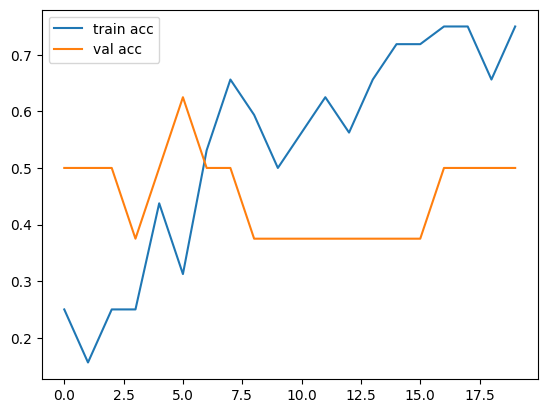

In [236]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()